# **Classical Binary Particle Swarm Optimisation applied to 0 1  Knapsack**



 

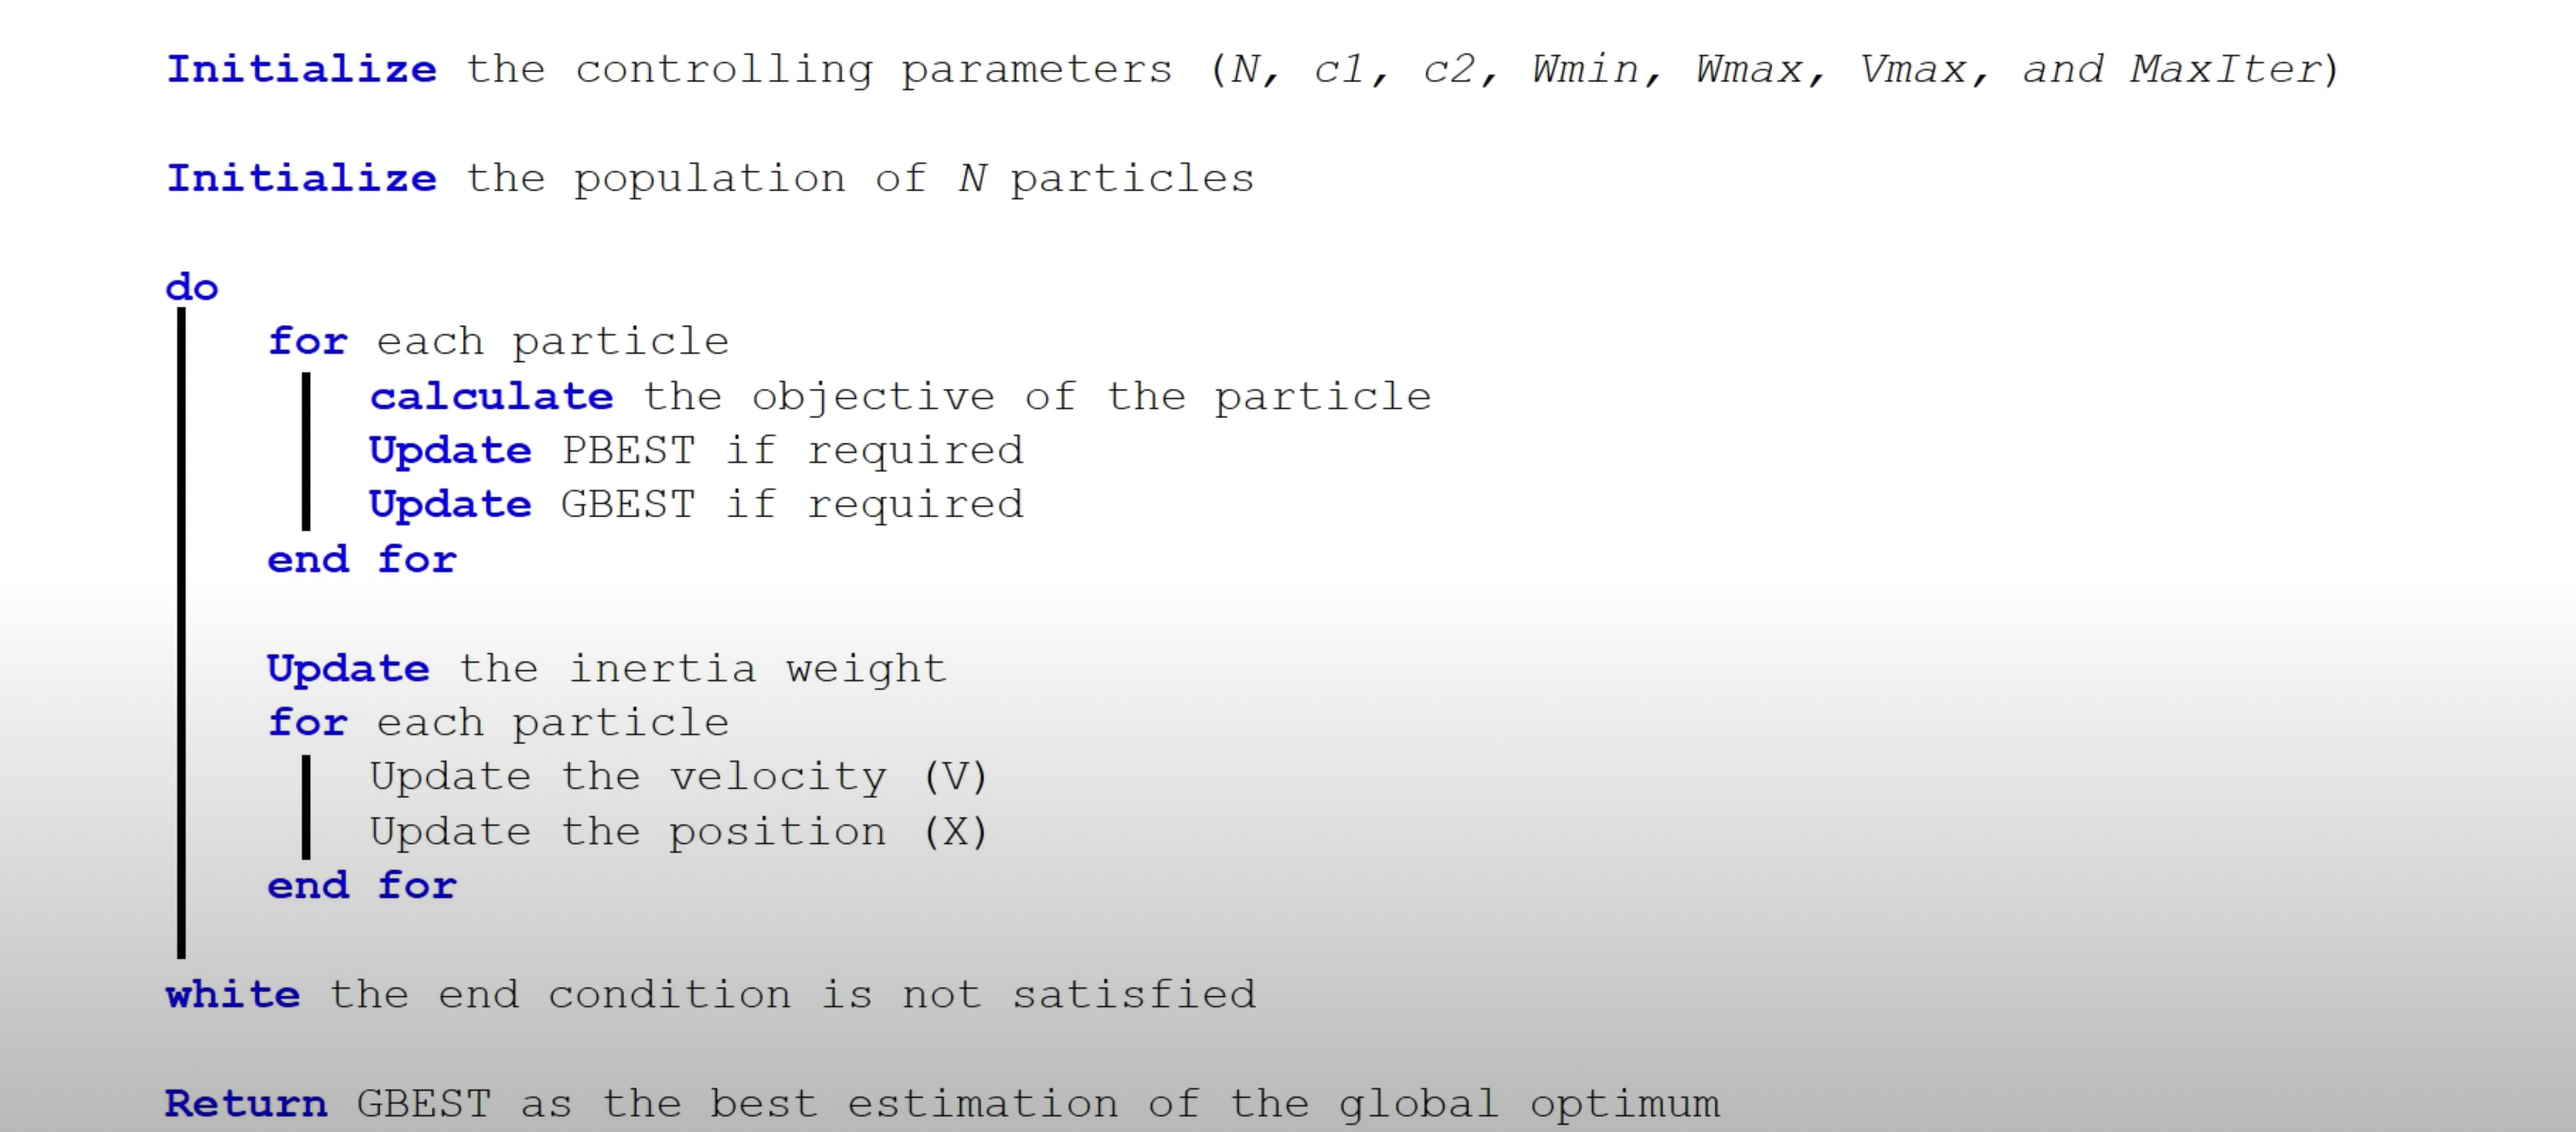

In [ ]:
#importing the libraries
import matplotlib.pyplot as plt
import random
import math


In [ ]:
ItemNames = ['A', 'B', 'C', 'D', 'E', 'F', 'G','H','I','J']
profit = [35, 85, 135, 10, 25, 2, 94,33,21,45]
weight = [2, 3, 9, 0.5, 2, 0.1 , 4, 3, 8, 3]
Capacity = 25

In [ ]:
# Objective Function

def ObjectiveFunction(x):
    t = fncItemsprofit(x)
    return t + fncItemsweight (x, t)


def fncItemsprofit(x):
    total = 0
    for i in range(len(x)):
        total += x[i] * profit[i] # Item * Profit
    return total


def fncItemsweight(x, resetElement):
    total = 0
    for i in range(len(x)):
        total += x[i] * weight[i] # Grain * kg

    if total <= Capacity:
        if total <= resetElement:
            return resetElement - total
        else:
            return 0
    else:
        return -resetElement

In [ ]:

#Particle Class

# Attributes : Position , Velocity, pBest, pbestFitness, pCurrentFitness
# Methods : Evaluating Particle Fitness, Velocity Update, Position update

# Particle is a candidate solution in the search space. A Solution vector
# for the knapsack problem , the dim(particle)= no of items in the Knapsack, each particle hence encodes a candidate solution. (decision variable)

# parNumber = Particle number 
# Dimension = Dimension of the particle or number of items in the knapsack or Dimension of the Solution

 
class Particle:

    def __init__(self, startValues):
        self.position = [] # Particle position
        self.velocity = [] # Particle velocity
        self.pBest = [] # best position acheived by the particle
        self.pBestFitness= -1 # Best fitness achieved by the particle 
        self.pcurrentFitness = -1 # Current fitness of the particle, Value of the objective function for the current position
        
        for i in range(dimension): #n is the number of items in the knapsack, len(names), names is the names of the items in the knapsack
            self.velocity.append(random.uniform(-1, 1))
            self.position.append(startValues[i]) # start values , randomly initialized binary vector ,startValue[i]

    # Evaluate Particle Fitness
    def evaluateFitness(self, ObejectiveFunction):
        self.pcurrentFitness = ObjectiveFunction(self.position)

        # Update the position based on evaluated criteria
        if self.pcurrentFitness > self.pBestFitness or self.pBestFitness == -1:
            self.pBest = self.position
            self.pBestFitness = self.pcurrentFitness

    # Update new particle velocity
    def velocity_update(self, groupMaxPosition):
        w = 0.99 # Inertia coefficient is of the desire to maintain the previous velocity of the particle.
        c1 = 1.99 # Cognitive coefficient is of the desire to protect one's own best.
        c2 = 1.99 # Social Coefficient is of desire to get the best value of the swarm.

        for i in range(dimension): 
            r1 = random.random() #returns a random number between 0 to 1, this is to ensure stochasticty/randomness in the search space
            r2 = random.random()

            cognitive_speed = c1 * r1 * (self.pBest[i] - self.position[i])
            social_speed = c2 * r2 * (groupMaxPosition[i] - self.position[i])
            self.velocity[i] = w * self.velocity[i] + cognitive_speed + social_speed
   
    
    # Calculating new positions based on newly updated particle velocity, So
    def position_update(self, limitValues): #limit values is a n*2 vector with min vale in coloumn 0 and max value in coloumn 1
        for i in range(dimension):
            maxjump = (limitValues[i][1] - limitValues[i][0])

            if self.velocity[i] < -maxjump:
                self.velocity[i] = -maxjump
            elif self.velocity[i] > maxjump:
                self.velocity[i] = maxjump

            self.position[i] = self.position[i] + self.velocity[i]

            if self.position[i] > limitValues[i][1]: # If position is above upper limit value, pull to upper limit value
                self.position[i] = limitValues[i][1]
            elif self.position[i] < limitValues[i][0]: # If the position is below the lower limit value, pull it to the lower limit value
                self.position[i] = limitValues[i][0]
            else:
                self.position[i] = round(self.position[i]) 

In [ ]:
# Class Particle Swarm Optimisation 

# Attributes : 
# Functions :  

class PSO:
    stepProfit, stepWeight, groupMaxPosition, groupMaxFitness = [], [], [], -1

    def __init__(self, ObjectiveFunction, startValues,limitValues,parNumber,maxIter,print_steps=True):
        #parNumber is the number of particles , w'ell be selecting it 
        global dimension
        dimension = len(startValues) # dimensions of the solution  ####
        self.groupMaxFitness = -1 # Best approach for the group
        self.groupMaxPosition = [] # Best position for the group, binary vector

        # Initialisation 
        swarm = [] #2
        for i in range(parNumber):
            swarm.append(Particle(startValues))

        # Optimization, 
        counter = 0
        while counter < maxIter:
            counter += 1

            # Calculation of the fitness of the particles in the swarm 
            for j in range(parNumber):
                swarm[j].evaluateFitness(ObjectiveFunction)

                # Evaluation and update of bests
                if swarm[j].pcurrentFitness > self.groupMaxFitness or self.groupMaxFitness == -1:
                    self.groupMaxPosition = list(swarm[j].position)
                    self.groupMaxFitness = float(swarm[j].pcurrentFitness)

            # Updating speeds and positions in the herd
            for j in range(parNumber):
                swarm[j].velocity_update(self.groupMaxPosition)
                swarm[j].position_update(limitValues)
            
            totalProfit = 0
            totalWeight = 0
            
            for i in range(dimension):
                totalProfit += self.groupMaxPosition[i] * profit[i]
                totalWeight += self.groupMaxPosition[i] * weight[i]
            
            self.stepProfit.append(totalProfit)
            self.stepWeight.append(totalWeight)

            if(print_steps):
                print(self.groupMaxPosition)
    
    def Print_Result(self):
        print('\n\nRESULTS:\n\n')
        totalProfit = 0
        totalWeight = 0
        for i in range(len(self.groupMaxPosition)):
            print(ItemNames[i], ': ', self.groupMaxPosition[i], ' Item', sep='')
            totalProfit += self.groupMaxPosition[i] * profit[i]
            totalWeight += self.groupMaxPosition[i] * weight[i]
        print('\nProfit: ', totalProfit, ',\nKilogram: ', totalWeight, sep='')

    # Drawing the results on the screen with plot [The parameter named 'fileName' must be empty if we do not want to save the result image to the computer!]
    def result_is_Set(self, fileName = ''):
        plt.plot(self.stepProfit, self.stepWeight)
        plt.xlabel('Profit ')
        plt.ylabel('Weight (kg)')
        plt.title('Profit by Results - Kilogram Chart')
        plt.grid(True)

        if not(fileName == ''): # If the variable 'fileName' is not empty, save the file in png format with that name...
            fileName = fileName+".png"
            plt.savefig(fileName)

        plt.show()
        plt.close()

A: 0 - 1
B: 0 - 1
C: 0 - 1
D: 0 - 1
E: 0 - 1
F: 0 - 1
G: 0 - 1
H: 0 - 1
I: 0 - 1
J: 0 - 1
Number of Items 10


RESULTS:


A: 0 Item
B: 1 Item
C: 1 Item
D: 1 Item
E: 1 Item
F: 1 Item
G: 1 Item
H: 0 Item
I: 0 Item
J: 0 Item

Profit: 351,
Kilogram: 18.6


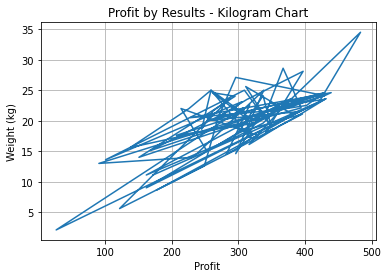

In [ ]:
#items =1000,compare ga ,dp.
#def main():
from random import randint, choice
import random

startValues=[]
LimitValues= []

for i in range(len(ItemNames)):
  startValues.append(randint(0,1)) # Startvalues ​​[x1, x2...]
  LimitValues.append([0, 1]) # Limit values ​​[(x1_min,x1_max),(x2_min,x2_max)...] math.floor(Capacity/weight[i])
  print(ItemNames[i], ': ', LimitValues[i][0], ' - ', LimitValues[i][1], sep='')
print('Number of Items ', len(ItemNames), sep='')
pso = PSO(ObjectiveFunction, startValues, LimitValues,len(ItemNames),maxIter=50,print_steps=False)
pso.Print_Result()
pso.result_is_Set(fileName='test')

#if __name__ == "__main__":
   # main()


In [ ]:

# Issues

  # All particles are initialzed at the same position.
  # once 0 is flipped to 1, it stays one forever


  # Exploration vs Exploitation
  # Intertia and Learning rates  


In [ ]:
#dynamic Programming solution 
def knapSack(W, wt, val, n):
    K = [[0 for x in range(W + 1)] for x in range(n + 1)]
  
    # Build table K[][] in bottom up manner
    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif wt[i-1] <= w:
                K[i][w] = max(val[i-1] + K[i-1][int(w-wt[i-1])],  K[i-1][w])
            else:
                K[i][w] = K[i-1][w]
  
    return K[n][W]

print(knapSack(Capacity,weight,profit,len(ItemNames)))

437
